# Predicting quaterly Typical Price 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2
import datetime
import math
import pandas_datareader as web

##  Load Amazon data


In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 1, 1)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015


In [3]:
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013


In [4]:
amzn.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015
1509,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966


In [5]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
Date         1510 non-null datetime64[ns]
High         1510 non-null float64
Low          1510 non-null float64
Open         1510 non-null float64
Close        1510 non-null float64
Volume       1510 non-null int64
Adj Close    1510 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


In [6]:
amzn.size

10570

In [7]:
amzn.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999665,0.999833,0.999780,0.113507,0.999780
Low,0.999665,1.000000,0.999729,0.999805,0.096590,0.999805
Open,0.999833,0.999729,1.000000,0.999567,0.107257,0.999567
Close,0.999780,0.999805,0.999567,1.000000,0.104311,1.000000
Volume,0.113507,0.096590,0.107257,0.104311,1.000000,0.104311
Adj Close,0.999780,0.999805,0.999567,1.000000,0.104311,1.000000


### Calculating daily typical price of AMZN  that is mean of (High+Low+Close)

In [8]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007


### Fama French Data


In [9]:
fama = pd.read_csv("../data/F-F_Research_Data_Factors_daily.csv")
fama.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [10]:
fama.tail()

,Date,Mkt-RF,SMB,HML,RF
24678,20200224,-3.38,0.19,-0.04,0.006
24679,20200225,-3.09,-0.10,-0.72,0.006
24680,20200226,-0.52,-0.41,-1.26,0.006
24681,20200227,-4.22,0.73,0.14,0.006
24682,20200228,-0.78,0.27,-0.78,0.006


In [11]:
fama.size

123415

In [12]:
fama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24683 entries, 0 to 24682
Data columns (total 5 columns):
Date      24683 non-null int64
Mkt-RF    24683 non-null float64
SMB       24683 non-null float64
HML       24683 non-null float64
RF        24683 non-null float64
dtypes: float64(4), int64(1)
memory usage: 964.3 KB


### 'Date' is an object. Hence, we need to convert it to Date format.

In [13]:
fama['Date'] = pd.to_datetime(fama['Date'], format='%Y%m%d')

In [14]:
fama['Date'].dtype

dtype('<M8[ns]')

# ADS index data

In [15]:
ads = pd.read_excel("../data/ads_vintages-zip.xlsx")
ads

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_022820,ADS_Index_030520,ADS_Index_030620,ADS_Index_031220,ADS_Index_031720,ADS_Index_031920,ADS_Index_032620,ADS_Index_032720,ADS_Index_040220,ADS_Index_040320
0,1960-03-01,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22217,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22218,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22219,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ads.head()

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_022820,ADS_Index_030520,ADS_Index_030620,ADS_Index_031220,ADS_Index_031720,ADS_Index_031920,ADS_Index_032620,ADS_Index_032720,ADS_Index_040220,ADS_Index_040320
0,1960-03-01,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


### Dropping unwanted columns from ADS Data

In [17]:
ADS = ads.loc[:,['Date','ADS_Index_010920']]

In [18]:
ADS.head()

,Date,ADS_Index_010920
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532


In [19]:
ADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22221 entries, 0 to 22220
Data columns (total 2 columns):
Date                22221 non-null datetime64[ns]
ADS_Index_010920    21859 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 347.3 KB


# Merging Amazon data with FAMA AND ADS


In [20]:
amzn_AF = pd.merge(amzn, fama, on='Date')

In [21]:
amzn_AF.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,-0.88,-0.27,0.12,0.0
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,0.03,0.36,0.05,0.0
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.34,-0.57,0.26,0.0
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,0.68,0.40,-0.41,0.0
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.04,0.01,-0.11,0.0


In [22]:
amzn_AF = pd.merge(amzn_AF, ADS, on='Date')
amzn_AF.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,-0.88,-0.27,0.12,0.0,-0.365855
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,0.03,0.36,0.05,0.0,-0.378983
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.34,-0.57,0.26,0.0,-0.412198
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,0.68,0.40,-0.41,0.0,-0.420924
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.04,0.01,-0.11,0.0,-0.428513


In [23]:
amzn_AF.to_csv('../data/merged.csv')

### Resampling daily data to MONTHLY aggregated data

In [24]:
amzn_AF.set_index('Date', inplace=True)

In [25]:
month_agg = amzn_AF.resample('M').mean()
month_agg

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.157619,0.043810,-0.102381,0.000,-0.380487
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.242105,0.019474,-0.022632,0.000,0.122650
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,0.022381,-0.087619,0.242381,0.000,0.436126
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.007619,-0.200952,0.055238,0.000,0.308517
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.099048,-0.083810,-0.014286,0.000,0.242648
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.107273,-0.112727,-0.235455,0.007,0.035436
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,0.072500,-0.041000,0.332000,0.009,-0.364348
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.092174,0.011304,-0.086957,0.007,-0.556550


In [26]:
month_agg.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.157619,0.043810,-0.102381,0.0,-0.380487
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.242105,0.019474,-0.022632,0.0,0.122650
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,0.022381,-0.087619,0.242381,0.0,0.436126
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.007619,-0.200952,0.055238,0.0,0.308517
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.099048,-0.083810,-0.014286,0.0,0.242648


### Calculate log returns for TypicalPrice Month over Month

In [27]:
month_agg['Typical_Price_MOM'] = (np.log(month_agg.Typical_Price) - np.log(month_agg.Typical_Price.shift(1))) * 100.
month_agg['Volume_MOM'] = (np.log(month_agg.Volume) - np.log(month_agg.Volume.shift(1))) * 100.


month_agg


,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.157619,0.043810,-0.102381,0.000,-0.380487,NaN,NaN
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.242105,0.019474,-0.022632,0.000,0.122650,-11.017065,12.443644
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,0.022381,-0.087619,0.242381,0.000,0.436126,2.609963,-19.817008
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.007619,-0.200952,0.055238,0.000,0.308517,-12.246440,60.840880
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.099048,-0.083810,-0.014286,0.000,0.242648,-6.004035,-56.516418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.107273,-0.112727,-0.235455,0.007,0.035436,-9.044258,8.627591
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,0.072500,-0.041000,0.332000,0.009,-0.364348,0.254574,-17.014808
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.092174,0.011304,-0.086957,0.007,-0.556550,-2.695753,0.016580


In [28]:
month_agg.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.157619,0.043810,-0.102381,0.0,-0.380487,NaN,NaN
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.242105,0.019474,-0.022632,0.0,0.122650,-11.017065,12.443644
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,0.022381,-0.087619,0.242381,0.0,0.436126,2.609963,-19.817008
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.007619,-0.200952,0.055238,0.0,0.308517,-12.246440,60.840880
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.099048,-0.083810,-0.014286,0.0,0.242648,-6.004035,-56.516418


In [29]:
month_agg.tail()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.107273,-0.112727,-0.235455,0.007,0.035436,-9.044258,8.627591
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,0.072500,-0.041000,0.332000,0.009,-0.364348,0.254574,-17.014808
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.092174,0.011304,-0.086957,0.007,-0.556550,-2.695753,0.016580
2019-11-30,1784.218506,1764.300500,1775.338019,1774.293994,2.603810e+06,1774.293994,1774.271000,0.191000,0.041500,-0.090500,0.006,0.162244,1.327807,-16.116205
2019-12-31,1797.109997,1773.846662,1786.190011,1785.772845,3.245219e+06,1785.772845,1785.576501,0.131905,0.031429,0.086667,0.007,0.353785,0.635170,22.020709


### Line Charts to check ADS and Fama Factor Trends with Amazon Typical Price

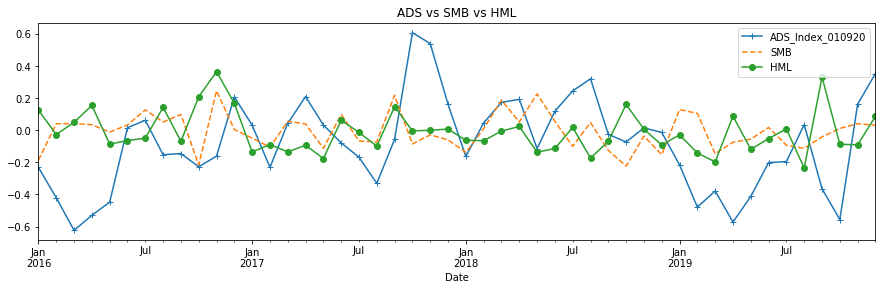

In [31]:
month_agg[['ADS_Index_010920','SMB','HML']].loc['2016-01-04':].plot(figsize=(15,4), style=['-+','--','-o'], 
                                                                    title = 'ADS vs SMB vs HML')


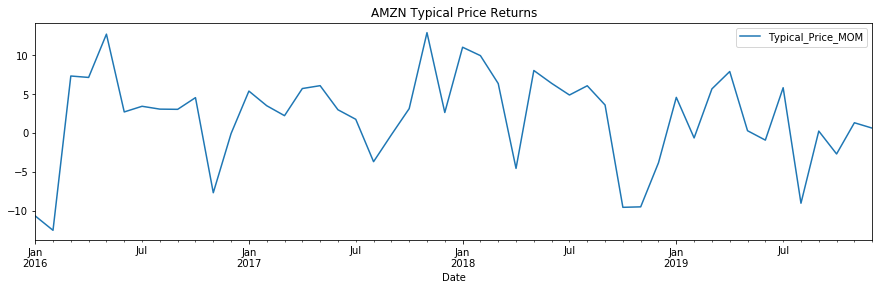

In [32]:
month_agg[['Typical_Price_MOM']].loc['2016-01-04':].plot(figsize=(15,4), style=['-','b'] , 
                                                        title = 'AMZN Typical Price Returns')

#### We can see AMZN trend is most similar to that of ADS index and SMB index, so we would use thes two as high frequency variables to predict AMZN Quaterly returns

### Resampling daily data to Quaterly aggregated data

In [33]:
quaterly_agg = amzn_AF.resample('Q').mean()

In [34]:
quaterly_agg
quaterly_agg['Typical_Price_QOQ'] = (np.log(quaterly_agg.Typical_Price) - np.log(quaterly_agg.Typical_Price.shift(1))) * 100.
quaterly_agg.tail()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_QOQ
Date,,,,,,,,,,,,,
2018-12-31,1699.961902,1631.938727,1672.156027,1662.728893,7.576563e+06,1662.728893,1664.876507,-0.246825,-0.139365,0.033492,0.008603,-0.025648,-12.126345
2019-03-31,1679.465586,1644.461478,1660.534420,1664.341315,5.176570e+06,1664.341315,1662.756126,0.208525,0.027049,-0.121639,0.009656,-0.353642,-0.127441
2019-06-30,1876.760628,1846.824126,1863.109991,1863.000475,4.035727e+06,1863.000475,1862.195076,0.056825,-0.038571,-0.028413,0.009333,-0.398573,11.327940
2019-09-30,1868.458754,1838.824844,1857.009216,1854.548281,3.345648e+06,1854.548281,1853.943960,0.005312,-0.083594,0.025625,0.008313,-0.168735,-0.444070
2019-12-31,1781.062809,1757.479687,1769.483139,1770.167810,2.977911e+06,1770.167810,1769.570102,0.136094,0.027344,-0.031094,0.006688,-0.033223,-4.657860


### Model - 1  using Typical Price 


In [35]:
AllModel_rmse = []

In [36]:
y, yl, x, yf, ylf, xf = mix_freq(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM, "3m", 1, 3,
                                 start_date=datetime.datetime(2016,1,31),
                                 end_date=datetime.datetime(2018,6,30))

In [37]:
res = estimate(y, yl, x, poly='beta')
res.x

/Users/dreamfires/Documents/ML Finance /Team Amazon/MIDAS_AMAZON/exp/Midas demo/midas/adl.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(np.concatenate([np.ones((len(xw), 1)), xw.reshape((len(xw), 1)), yl], axis=1), y)[0]


array([13.3550756 ,  2.10966789,  1.2273742 , 13.02602096, -1.07606025])

In [38]:
fc = forecast(xf, ylf, res, poly='beta')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh 
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,17.035060,16.912580,-0.122480
2018-12-31,5.011964,-12.126345,-17.138309
2019-03-31,13.218908,-0.127441,-13.346349
2019-06-30,19.822119,11.327940,-8.494179
2019-09-30,0.331638,-0.444070,-0.775708
2019-12-31,6.012090,-4.657860,-10.669950


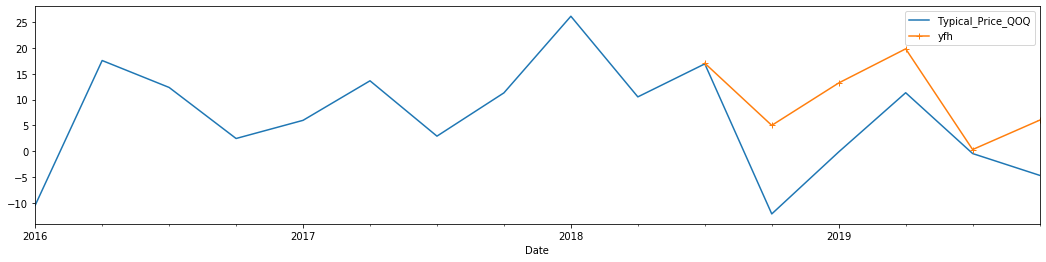

In [39]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(18, 4))

In [40]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

10.475863469708923

In [41]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923]

### Model 2 - considering typical price and change in volume MOM


In [42]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [43]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

/Users/dreamfires/Documents/ML Finance /Team Amazon/MIDAS_AMAZON/exp/Midas demo/midas/adl.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(np.concatenate([np.ones((len(xw1), 1)), xw1.reshape((len(xw1), 1)), xw2.reshape((len(xw2), 1)), yl], axis=1), y)[0]


array([ 10.33593201,  -0.14748601,   5.31940874, -79.31412837,
        19.83174043,  -3.05551386,   0.67853814,  -1.81532813])

In [44]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,9.584323,16.912580,7.328257
2018-12-31,1.098176,-12.126345,-13.224521
2019-03-31,-7.153349,-0.127441,7.025908
2019-06-30,33.734575,11.327940,-22.406635
2019-09-30,1.810887,-0.444070,-2.254957
2019-12-31,13.094956,-4.657860,-17.752816


In [45]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

13.541659807492866

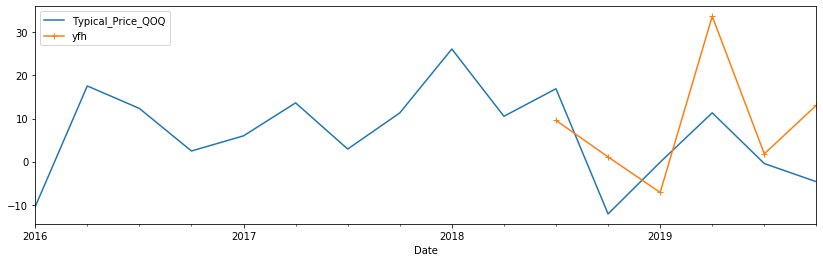

In [46]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [47]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.541659807492866]

### Model - 3 - considering Typical Price and ADS index


In [49]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM,month_agg.ADS_Index_010920, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [50]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([ 15.52712785,   3.44123483,  26.05194104,  30.36171857,
       -10.3480476 ,  -2.59933411,  -7.11212926,  -1.45816026])

In [51]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,27.226076,16.912580,-10.313496
2018-12-31,5.515613,-12.126345,-17.641958
2019-03-31,13.125486,-0.127441,-13.252927
2019-06-30,18.144673,11.327940,-6.816734
2019-09-30,-7.970123,-0.444070,7.526053
2019-12-31,-3.184140,-4.657860,-1.473721


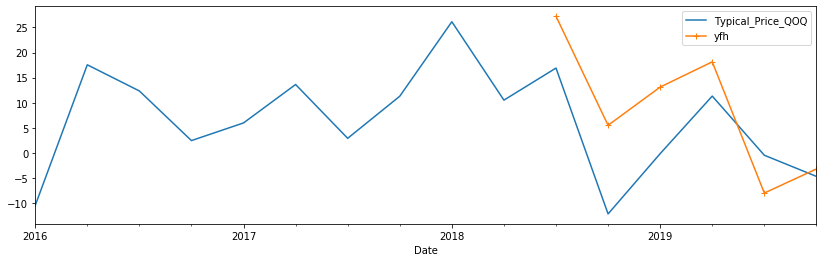

In [52]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [53]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

10.789872856522226

In [54]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.541659807492866, 10.789872856522226]

### Model 4 - using Typical Price and SMB 


In [55]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM,month_agg.SMB, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [56]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([ 1.19827982e+01,  1.25816880e+01,  3.17815778e+02,  1.38470892e+00,
       -3.85975252e-01,  8.77154322e+02, -2.92520023e+02, -5.87993050e+00])

In [57]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,45.380747,16.912580,-28.468167
2018-12-31,-42.650962,-12.126345,30.524617
2019-03-31,-46.207223,-0.127441,46.079783
2019-06-30,33.134151,11.327940,-21.806211
2019-09-30,-36.193854,-0.444070,35.749784
2019-12-31,-36.421253,-4.657860,31.763393


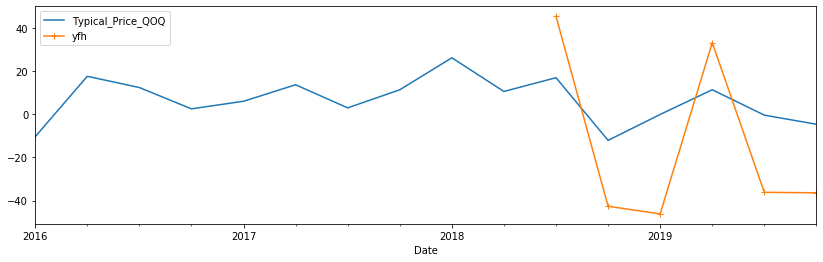

In [58]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [59]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

33.23654156293074

In [60]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.541659807492866, 10.789872856522226, 33.23654156293074]

### RMSE Graph

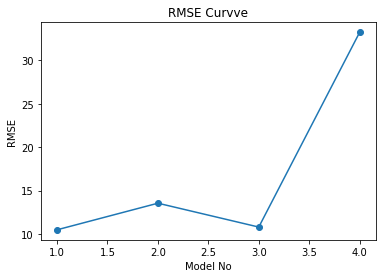

In [61]:
plt.scatter([1,2,3,4],list(AllModel_rmse) )
plt.plot([1,2,3,4],list(AllModel_rmse))
plt.xlabel('Model No')
plt.ylabel('RMSE')
plt.title('RMSE Curvve')
plt.show()


### Checking for Optimum horizons in model 2

In [62]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 4,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [63]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([18.00458674,  0.17293709,  1.11884278, 26.42185306, -9.3143633 ,
       -4.48090879, -7.26568765, -1.34282057])

In [64]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,3.768658,16.912580,13.143922
2018-12-31,1.075534,-12.126345,-13.201879
2019-03-31,22.507867,-0.127441,-22.635308
2019-06-30,10.978267,11.327940,0.349673
2019-09-30,4.484084,-0.444070,-4.928154
2019-12-31,9.345210,-4.657860,-14.003070


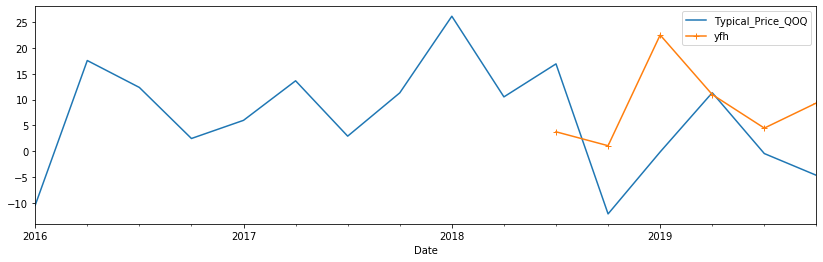

In [65]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [66]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

13.415814224860416

### We can observe by increasing horizon, we do generalize the model around mean and it does not follow the predictive trend,we can chose 3 as optimal horizon

### Retaining it for 3 Horizon - Model 2

In [67]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,3,31))

In [68]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([26.66794147, -0.12208882,  2.53614949, 40.20362108, -7.5626891 ,
       46.63618477, -9.66069035, -2.8204745 ])

In [69]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-06-30,-26.939694,10.525153,37.464847
2018-09-30,13.051486,16.912580,3.861094
2018-12-31,-7.366618,-12.126345,-4.759727
2019-03-31,31.633811,-0.127441,-31.761252
2019-06-30,30.685071,11.327940,-19.357131
2019-09-30,0.814227,-0.444070,-1.258297
2019-12-31,12.192686,-4.657860,-16.850546


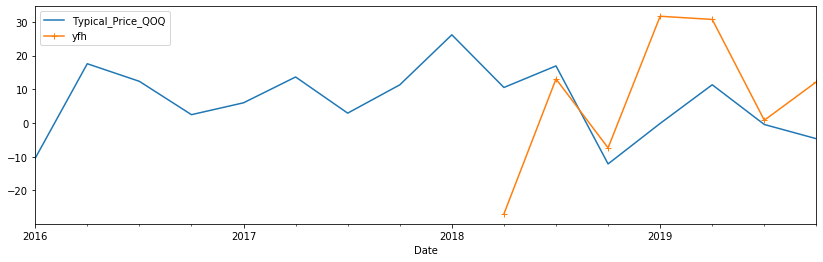

In [70]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [71]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

21.07868814362329

In [72]:
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-06-30,-26.939694,10.525153,37.464847
2018-09-30,13.051486,16.912580,3.861094
2018-12-31,-7.366618,-12.126345,-4.759727
2019-03-31,31.633811,-0.127441,-31.761252
2019-06-30,30.685071,11.327940,-19.357131
2019-09-30,0.814227,-0.444070,-1.258297
2019-12-31,12.192686,-4.657860,-16.850546


In [73]:
forecast_df.size

21

In [74]:
y_pred = [] * 10

for i in range(len(forecast_df)+1):
    if i == 0:
        y_pred.append(1587.068490)
    else:
        y_pred.append(math.exp(forecast_df['yfh'][i-1]/100) * y_pred[i-1])

In [75]:
y_pred[0:-1]

[1587.06849,
 1212.2663909758537,
 1381.2743487317912,
 1283.1786713791528,
 1760.6418804326722,
 2392.955362718726,
 2412.5189879783757]

In [76]:
quaterly_agg.Typical_Price['2018-09-30':]

Date
2018-09-30    1879.516191
2018-12-31    1664.876507
2019-03-31    1662.756126
2019-06-30    1862.195076
2019-09-30    1853.943960
2019-12-31    1769.570102
Freq: Q-DEC, Name: Typical_Price, dtype: float64

In [77]:
Trading_df = pd.DataFrame({'Actual_Typical_Price':quaterly_agg.Typical_Price['2018-06-30':],
                           'Predicted_Typical_Price' : y_pred[0:-1]
                          })

In [78]:
Trading_df

,Actual_Typical_Price,Predicted_Typical_Price
Date,,
2018-06-30,1587.068490,1587.068490
2018-09-30,1879.516191,1212.266391
2018-12-31,1664.876507,1381.274349
2019-03-31,1662.756126,1283.178671
2019-06-30,1862.195076,1760.641880
2019-09-30,1853.943960,2392.955363
2019-12-31,1769.570102,2412.518988


# Monthly Trading Strategy for MIDAS

In [79]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(Trading_df)-1):
    if Trading_df['Predicted_Typical_Price'][i+1] > Trading_df['Actual_Typical_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Trading_df['Actual_Typical_Price'][i])
            balance = int(amount % Trading_df['Actual_Typical_Price'][i])
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Trading_df['Actual_Typical_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            amount = portfolio + balance
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Trading_df['Predicted_Typical_Price'][i+1] < Trading_df['Actual_Typical_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
 



Stock: 1587.0684903462736 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1879.5161914320856 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1664.876507471478 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1662.7561261953554 Action: Buy Portfolio: 9976.54 Stocks: 6 Balance_init: 23 total($) 9999.54
Stock: 1862.1950761098706 Action: Bought--Holding Portfolio: 11173.17 Stocks: 6 Balance_init: 23 total($) 11196.17
Stock: 1853.943959554037 Action: Bought--Holding Portfolio: 11123.66 Stocks: 6 Balance_init: 23 total($) 11146.66


In [80]:
Amount

[10000, 10000, 10000, 10000.0, 11196.0, 11147.0]

In [81]:
np.mean(Amount)

10390.5

In [82]:
import statistics

In [83]:
Returns = [10000.0+11196.0+11147.0]

In [84]:
np.average(Returns)

32343.0

In [85]:
import statistics
statistics.stdev(Amount)

605.1584090137061